<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:35
🔁 Restarting kernel...


In [ ]:
# check that everything works
import condacolab
condacolab.check()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/summary.csv")

x_values = np.asarray_chkfinite(df["literature"][46:75])
y_values = np.asarray_chkfinite(df['pmx'][46:75])

In [5]:
# define experimental and calculated values
# draw from normal distribution
x_mu, x_sigma = 10.0, 1.5 
x_values = np.random.normal(x_mu, x_sigma, 1000)

y_mu, y_sigma = 11.0, 1.5 
y_values = np.random.normal(y_mu, y_sigma, 1000)

<class 'numpy.ndarray'>


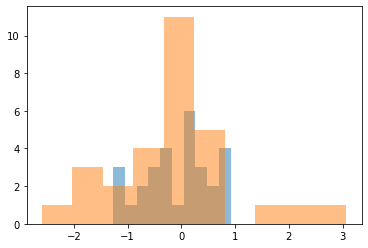

In [41]:
plt.hist(x_values, alpha=0.5)
plt.hist(y_values, alpha=0.5)
plt.show()

In [42]:
# bootstrap metric
def bootstrap_metric(fct, x_values, y_values):
    assert callable(fct) == True
    bootstrapped_metric = []
    # bootstrap metric to generate test distribution
    for _ in range(1000):
        indices = np.random.choice(range(0, len(x_values)), size=len(x_values), replace=True)
        x_selection = np.take(x_values, indices)
        y_selection = np.take(y_values, indices)
        r = fct(x_selection, y_selection)
        bootstrapped_metric.append(r)
    
    # define 90% CI
    alpha = 10.0
    lower_p = alpha / 2.0
    # get value at or near percentile (take a look at the definition of percentile if 
    # you have less than 100 values to make sure you understand what is happening)
    lower = np.percentile(bootstrapped_metric, lower_p)
    upper_p = (100 - alpha) + (alpha / 2.0)
    upper = np.percentile(bootstrapped_metric, upper_p)
    # calculate true mean
    mean = fct(x_values, y_values)

    return mean, lower, upper

# bootstrap MAE
mean, lower, upper = bootstrap_metric(mean_absolute_error, x_values, y_values)
print(f'MAE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')

# bootstrap RMSE
def calc_rmse(x_values, y_values):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(x_values, y_values))
mean, lower, upper = bootstrap_metric(calc_rmse, x_values, y_values)
print(f'RMSE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')



MAE:  0.68 [0.49, 0.87]
RMSE:  0.95 [0.67, 1.19]
